<a href="https://colab.research.google.com/github/MassGH2023/Regression-Models/blob/main/ship_fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?




In [ ]:
# Install the required libraries
!pip install -U scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

## Import the required libraries


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/MassGH2023/Regression-Models/refs/heads/main/datasets/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [93]:
target = "charges"
features = [x for x in data.columns if x != target]
numcols = ['age' ,	'bmi' ,	'children' ,	'charges']
catcols = data.select_dtypes("O").columns
catcols

Index(['sex', 'smoker', 'region'], dtype='object')

In [73]:
normaltest(data[target])

NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

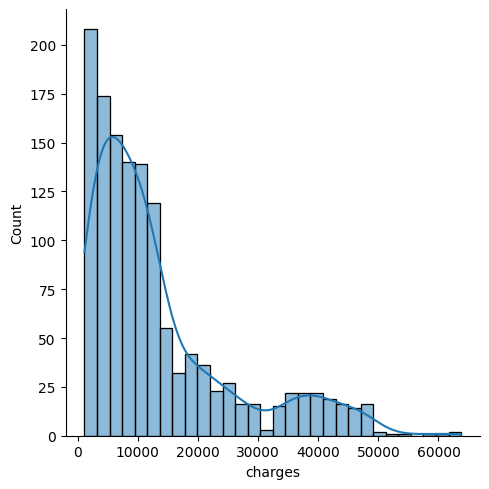

In [76]:
sns.displot(data[target], kde = 1);

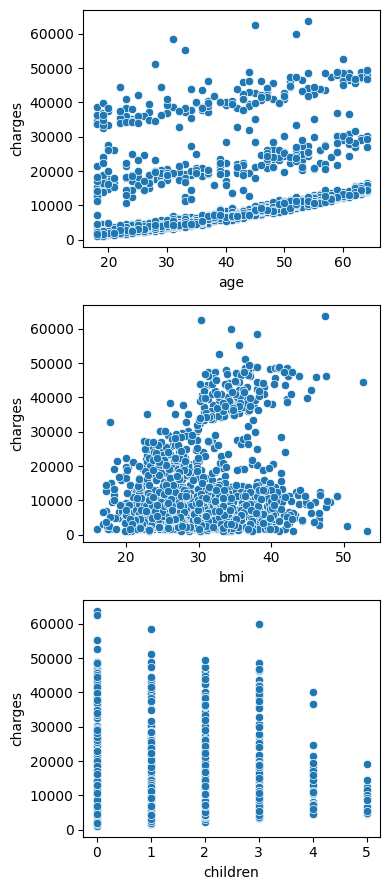

In [82]:
f, a = plt.subplots(3,1, figsize = (4,9))
a= a.flatten()
for i, c in enumerate(['age' ,	'bmi' ,	'children' ]):
  sns.scatterplot(data = data, x = c, y = target, ax = a[i])

plt.tight_layout()

NormaltestResult(statistic=54.41810197267585, pvalue=1.524962972734675e-12)


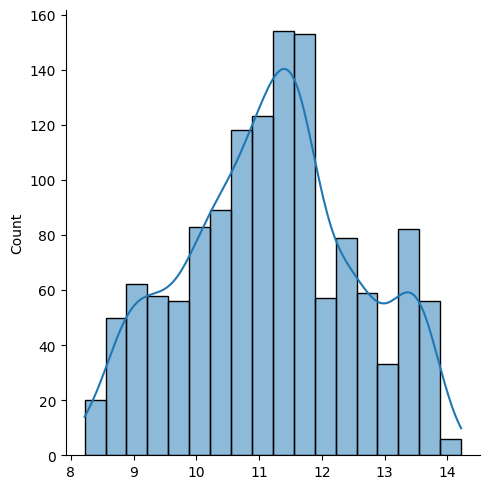

In [84]:
y = data[target]
y_bc, lam = stats.boxcox(y)
print(normaltest(y_bc))
sns.displot(y_bc, kde = 1);

In [ ]:
sns.pallet

<Axes: >

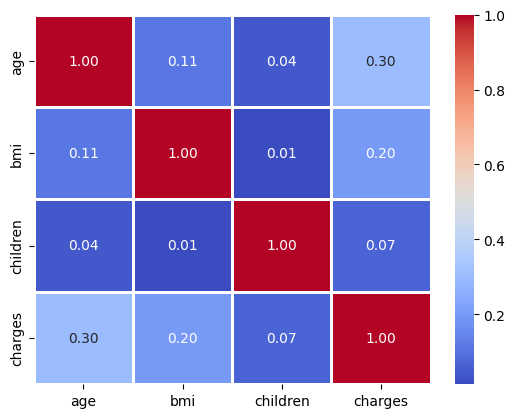

In [104]:
sns.heatmap(data[numcols].corr(), annot = True, cmap="coolwarm", linecolor = 'white', linewidths=2, fmt=".2f")

# 2. Objectives


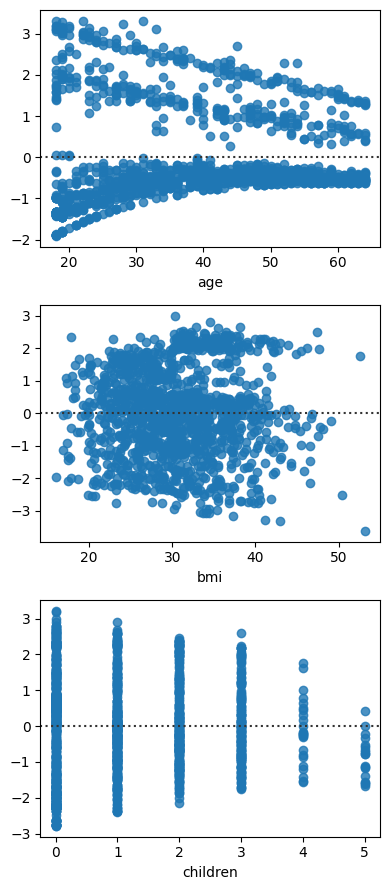

In [105]:
f, a = plt.subplots(3,1, figsize = (4,9))
a= a.flatten()
for i, c in enumerate(['age' ,	'bmi' ,	'children' ]):
  sns.residplot(data = data, x = c, y = y_bc, ax = a[i])

plt.tight_layout()

In [112]:
df_ = pd.get_dummies(data, columns=['sex', 'smoker'], drop_first= True)
df = pd.get_dummies(df_, drop_first= False)

In [114]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,False,True
1,18,33.770,1,1725.55230,True,False,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False,False
4,32,28.880,0,3866.85520,True,False,False,True,False,False


In [124]:
Wchildren = df[['children' ,'charges']].loc[df.children > 0]
WOchildren = df[['children' ,'charges']].loc[df.children == 0]
from scipy.stats import ttest_ind
stat, p_v = ttest_ind(WOchildren['charges'],Wchildren['charges'])
p_v < 0.05

True

# 3. Linear Regression Models


**linear modeling comparison without polynomial features and scaling**

**linear modeling comparison wit polynomial features and without scaling**

**linear modeling comparison with polynomial features and scaling**

**cross-validation method**

**GridSearch on alpha, pf degree**

# 4. Insights and key findings


# 5. Next Steps


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
